In [104]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [105]:
def importImages (image):
    result = cv.imread(image)
    return result

In [106]:
dataset = np.array([
    "MONOCYTE.png",
    "LYMPHOCYTE.png",
    "EOSINOPHIL.png",
    "BASOPHIL.png",
    "NEUTROPHIL.png",
])


In [107]:
def plot (value):
    plt.figure(facecolor='white', figsize=[20, 20])
    for i in range (dataset.shape[0]):
        plt.subplot(1, dataset.shape[0], i+1)
        plt.title(dataset[0][:-4])
        plt.imshow(importImages(value[i]))
        


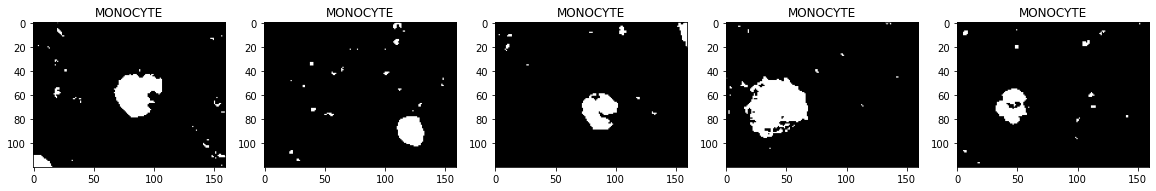

In [109]:
plot(dataset)

In [110]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
kernel

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

# DILASI

In [ ]:
def Dilasi(image, kernel):
    padd = kernel.shape[0]//2
    row, col = image.shape
    dilImage = np.pad(np.zeros(image.shape), padd)
    jum = (kernel==0).sum()

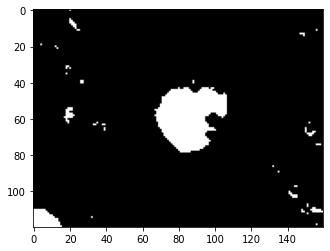

In [112]:
plt.imshow(importImages(dataset[0]))